In [1]:
#step 1 :- Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#step 2:- Load data
from sklearn.model_selection import train_test_split
(x_train ,y_train),(x_test,y_test) = tf.keras.datasets.imdb.load_data(
    path='imdb.npz',
    test_split =0.2,
    seed = 42,
    num_words=10000
)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#step 3:- Prepare data
#One-hot Encode our lists and turn them into vectors of 0's and 1's.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
x_train = vectorize_sequences(x_train)

# Vectorize testing Data
x_test = vectorize_sequences(x_test)

In [4]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
x_train.shape

(25000, 10000)

In [6]:
y_train = np.asarray(y_train).astype('float32')
y_test  = np.asarray(y_test ).astype('float32')

In [7]:
# Input for Validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
#step 4 :- Building the network
from tensorflow.keras.optimizers import Adam
# Building the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=16, activation='relu', input_shape=(10000,)),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compiling the model
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)

# Training the model
history = model.fit(
    partial_x_train,
    partial_y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_val, y_val)
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6769 - loss: 0.6407 - val_accuracy: 0.8585 - val_loss: 0.4323
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8842 - loss: 0.3768 - val_accuracy: 0.8853 - val_loss: 0.3225
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9137 - loss: 0.2664 - val_accuracy: 0.8932 - val_loss: 0.2842
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9301 - loss: 0.2165 - val_accuracy: 0.8960 - val_loss: 0.2692
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9449 - loss: 0.1799 - val_accuracy: 0.8934 - val_loss: 0.2689
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9528 - loss: 0.1550 - val_accuracy: 0.8931 - val_loss: 0.2677
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9618 - loss: 0.1332 - val_accuracy: 0.8912 - val_loss: 0.2769
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9721 - loss: 0.1112 - val_accuracy: 0.

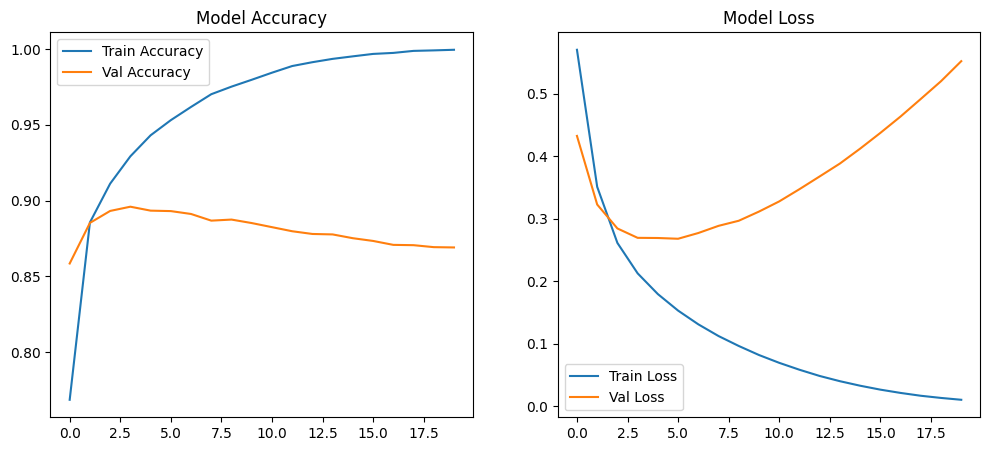

In [10]:
# Step 5:-Plot accuracy & loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Model Loss")

plt.show()

In [11]:
#step 6 :- Model Prediction
y_pred = model.predict(x_test)
y_pred[0]

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([0.9994586], dtype=float32)